In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
import matplotlib.pyplot as plt

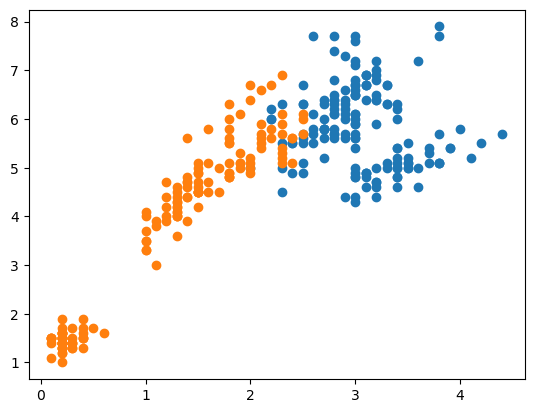

In [31]:
plt.scatter(df['sepal_width'],df['sepal_length'])
plt.scatter(df['petal_width'],df['petal_length'])

Text(0.5, 0, 'sepal_length')

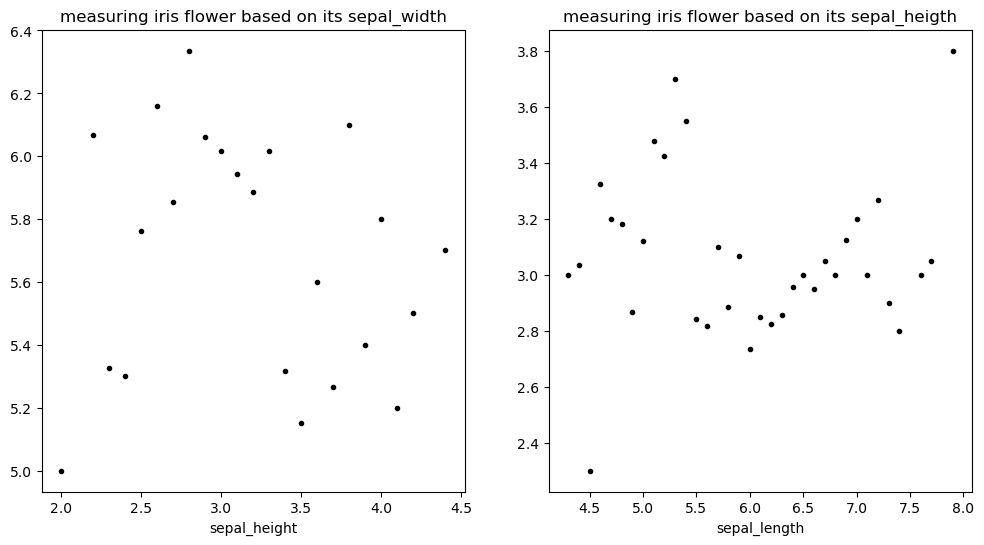

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df['sepal_length'].groupby(df['sepal_width']).mean(),'.k')
plt.title("measuring iris flower based on its sepal_width")
plt.xlabel("sepal_height")
plt.subplot(1,2,2)
plt.plot(df['sepal_width'].groupby(df['sepal_length']).mean(),'.k')
plt.plot()
plt.title("measuring iris flower based on its sepal_heigth")
plt.xlabel("sepal_length")

Text(0.5, 0, 'petal_length')

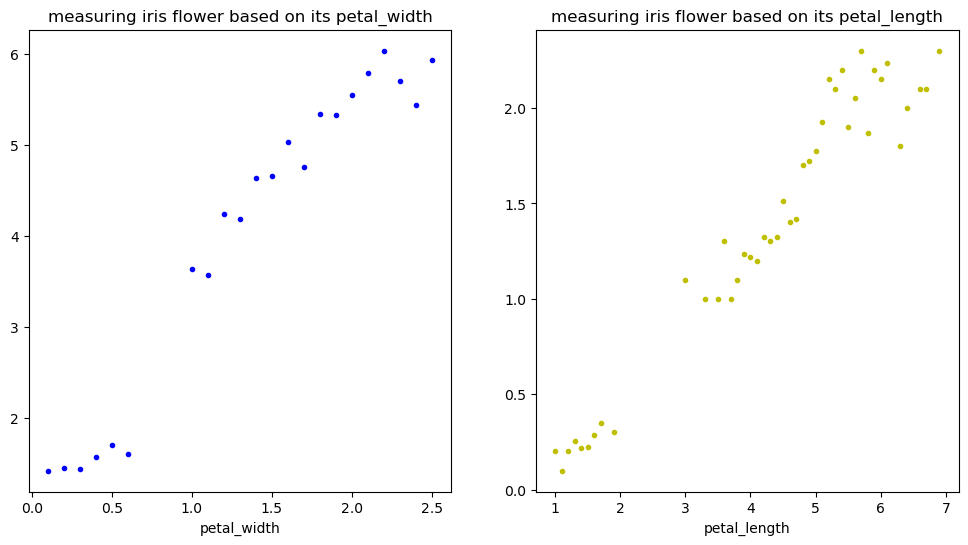

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df['petal_length'].groupby(df['petal_width']).mean(),'.b')
plt.title("measuring iris flower based on its petal_width")
plt.xlabel("petal_width")
plt.subplot(1,2,2)
plt.plot(df['petal_width'].groupby(df['petal_length']).mean(),'.y')
plt.title("measuring iris flower based on its petal_length")
plt.xlabel("petal_length")

In [7]:
from collections import Counter

In [8]:
print(Counter(df['species']))

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [11]:
print(Counter(df['species']))

Counter({0: 50, 1: 50, 2: 50})


In [12]:
setosa=df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].groupby(df['species'][df['species']==0]).mean()
versicolor=df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].groupby(df['species'][df['species']==1]).mean()
virginica=df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].groupby(df['species'][df['species']==2]).mean()

In [13]:
display(setosa)
display(versicolor)
display(virginica)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0.0,5.006,3.418,1.464,0.244


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
1.0,5.936,2.77,4.26,1.326


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
2.0,6.588,2.974,5.552,2.026


In [14]:
import numpy as np

Text(0.5, 0, "virginica's sepal_width,sepal_height,petal_heigth,petal_width")

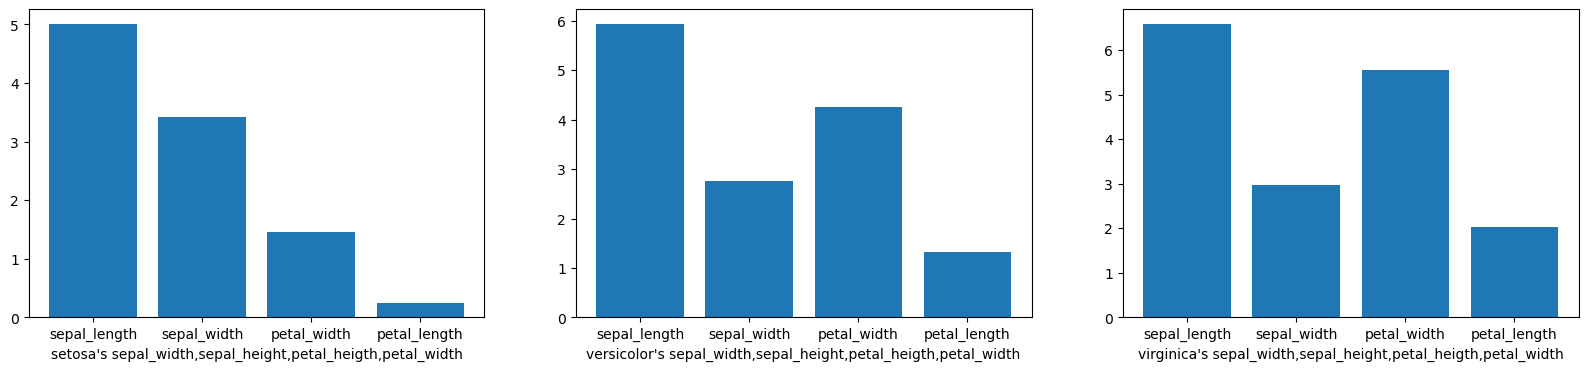

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
l=setosa.loc[:1,:].values[0]
plt.bar(np.arange(4),l,tick_label=['sepal_length','sepal_width','petal_width','petal_length'])
plt.xlabel("setosa's sepal_width,sepal_height,petal_heigth,petal_width")
plt.subplot(1,3,2)
l=versicolor.loc[:1,:].values[0]
plt.bar(np.arange(4),l,tick_label=['sepal_length','sepal_width','petal_width','petal_length'])
plt.xlabel("versicolor's sepal_width,sepal_height,petal_heigth,petal_width")
plt.subplot(1,3,3)
l=virginica.loc[:,:].values[0]
plt.bar(np.arange(4),l,tick_label=['sepal_length','sepal_width','petal_width','petal_length'])
plt.xlabel("virginica's sepal_width,sepal_height,petal_heigth,petal_width")

In [16]:
df['total_measure']=df['sepal_width']+df['sepal_length']+df['petal_width']+df['petal_length']

<BarContainer object of 3 artists>

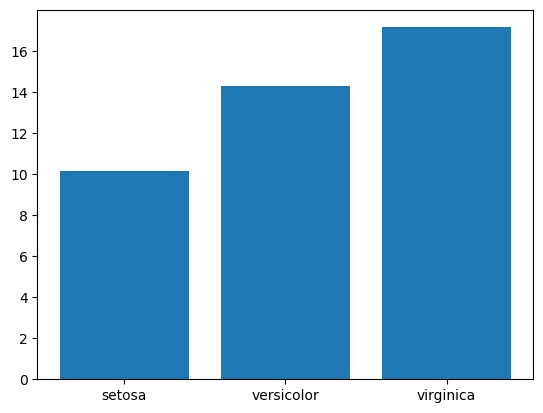

In [17]:
plt.bar(['setosa','versicolor','virginica'],df['total_measure'].groupby(df['species']).mean())

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.iloc[:,:4]
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [22]:
y_pred

array([-0.18652104, -0.01987784,  0.24229607,  1.50991054,  1.18720685,
        1.60856726,  1.39425099,  1.21297918,  1.71733971, -0.01171032,
        1.7507029 , -0.2093027 ,  0.06634351,  1.92176495,  1.59015607,
        1.12939034,  1.14479607,  1.16424887, -0.01321305,  1.45948909,
        1.02829775, -0.10157186,  1.17187449,  1.17266641,  1.14384262,
        1.07712831,  0.92562167,  2.09202649,  0.01251244,  0.14929024])

In [23]:
lr.score(x_test,y_test)

0.9116682482949882

In [24]:
def plot_measure(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    plt.plot(y_pred,x_test)
    plt.scatter(y_test,x_test)

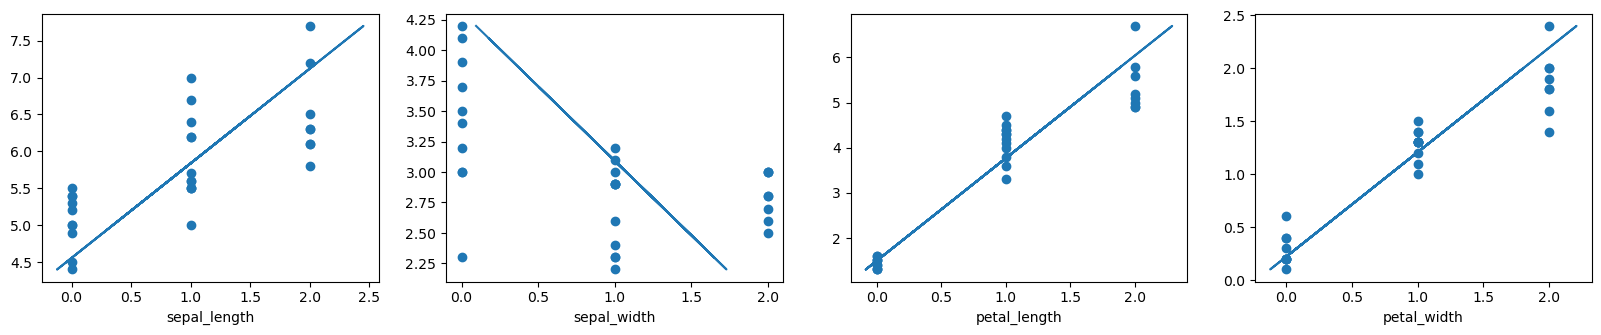

In [25]:
k=0
plt.figure(figsize=(20,16))
for i in df.iloc[:,:4].columns:
    j=""
    j+=i
    x=df[[j]]
    y=df[['species']]
    plt.subplot(4,4,k+1)
    plot_measure(x,y)
    plt.xlabel(j)
    k+=1